In [23]:
import pandas as pd
import numpy as np
from helper_functions import gradient_descent, linear_regression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set_theme()

In [43]:
salary = pd.read_csv("dataset/Experience-Salary.csv")
salary

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236
...,...,...
995,22.161741,24.666502
996,32.266497,24.160270
997,17.039030,19.903797
998,25.222124,21.974413


In [59]:
X = salary.iloc[:, :1]
y = salary.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

initial_w = np.array([1])
initial_b = 1

# Simple gradient descent to find w and b
new_w, new_b = gradient_descent(X_train, initial_w, initial_b, y_train, 100000, 0.0005)

367.680133116384
151.15418824076932
67.19802702741092
34.6446846747929
22.022353101710124
17.12810336629164
15.230352383888139
14.49446860058429
14.209089058484851
14.0983887524077
14.055418855963248
14.038710861034756
14.032185702301831
14.02960885739241
14.028562942681395
14.028110637995088
14.027888505317442
14.027755624613357
14.027657355323724
14.027572511030739
14.027492876878568
14.027415267625475
14.02733844822028
14.027261939781802
14.02718555662741
14.027109226759753
14.027032922261997
14.026956632309133
14.026880352703394
14.026804081816652
14.026727819017138
14.02665156405942
14.026575316847852
14.026499077344878
14.026422845535468
14.026346621413307
14.026270404975481
14.02619419622038
14.026117995146915
14.026041801754177
14.025965616041354
14.025889438007646
14.025813267652275
14.02573710497446
14.02566094997343
14.025584802648414
14.025508662998627
14.025432531023306
14.025356406721672
14.025280290092956
14.025204181136381
14.025128079851175
14.025051986236559
14.024975

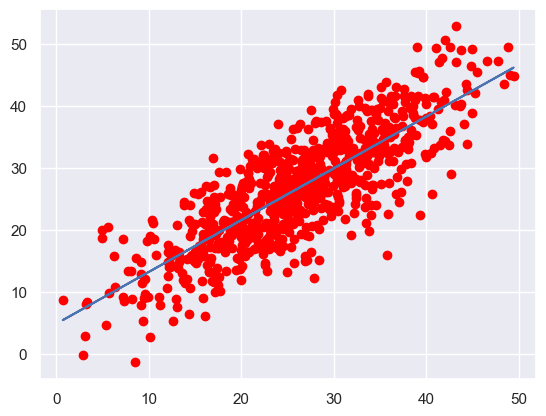

In [63]:
plt.scatter(x=X_train, y=y_train, c="red")
plt.plot(X_train, linear_regression(X_train, new_w, new_b))
plt.show()

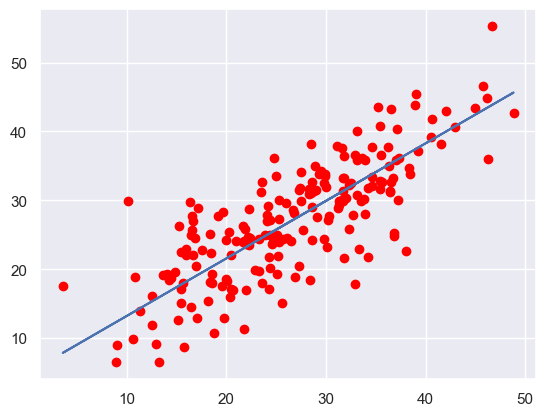

In [64]:
plt.scatter(x=X_test, y=y_test, c="red")
plt.plot(X_test, linear_regression(X_test, new_w, new_b))
plt.show()

In [32]:
salary["exp_category"] = pd.cut(salary["exp(in months)"], bins=10, labels=[1,2,3,4,5,6,7,8,9,10])

In [33]:
salary

,exp(in months),salary(in thousands),exp_category
0,18.290293,16.521825,4
1,17.023407,11.666234,4
2,26.343613,23.167255,6
3,19.105834,20.877145,4
4,27.742516,23.166236,6
...,...,...,...
995,22.161741,24.666502,5
996,32.266497,24.160270,7
997,17.039030,19.903797,4
998,25.222124,21.974413,6


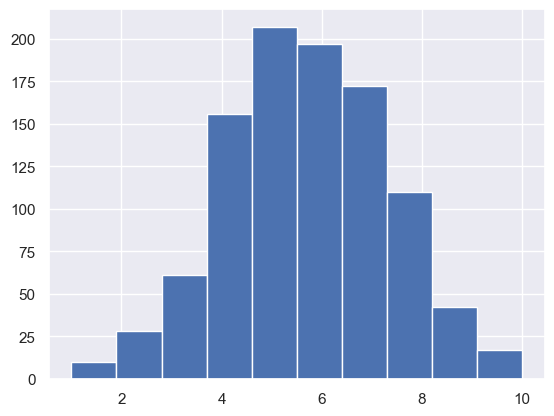

In [34]:
salary["exp_category"].hist()
plt.show()

In [35]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=42)
for train_index, test_index in split.split(salary, salary["exp_category"]):
    salary_train = salary.loc[train_index]
    salary_test = salary.loc[test_index]
    

In [36]:
salary["exp_category"].value_counts() / len(salary)

exp_category
5     0.207
6     0.197
7     0.172
4     0.156
8     0.110
3     0.061
9     0.042
2     0.028
10    0.017
1     0.010
Name: count, dtype: float64

In [37]:
salary_train["exp_category"].value_counts() / len(salary_train)

exp_category
5     0.20750
6     0.19625
7     0.17125
4     0.15625
8     0.11000
3     0.06125
9     0.04250
2     0.02750
10    0.01750
1     0.01000
Name: count, dtype: float64

In [38]:
salary_test["exp_category"].value_counts() / len(salary_test)

exp_category
5     0.205
6     0.200
7     0.175
4     0.155
8     0.110
3     0.060
9     0.040
2     0.030
10    0.015
1     0.010
Name: count, dtype: float64

In [39]:
for set_ in (salary_train, salary_test):
    set_.drop("exp_category", inplace=True, axis=1)

In [40]:
salary_train.shape[0]

800